## Example 1: Modelagem Only-Polos of a Signal Sintético (Sinusoide Amortecida) This example generates a signal sintético (sinusoid amortecida with noise), estima their coefficients Air (AutoRegressivos) via method of autocorrelação and withpaira the signal original with the modelado.

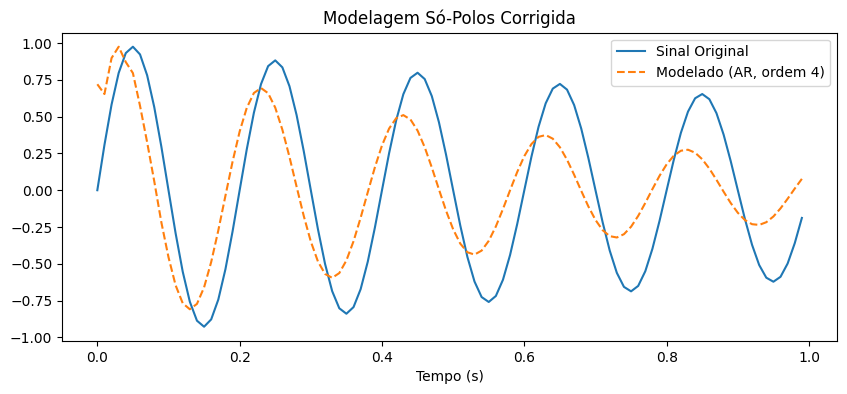

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.linalg import solve_toeplitz
from scipy.signal import lfilter

# Parâmetros of the signalfs = 100
t = np.arange(0, 1, 1/fs)
a = 0.5  # Coeficiente de amortecimentof = 5    # Frequency of the signal (Hz)
# To generate sinusoid amortecida with noise# # Creates a sinusoid amortecida (modelo comum in systems físicos ressonantes)# # Adiciona noise branco Gaussiano (randn) for simular condições reais# # fs = 100 Hz implica in frequency of Nyquist of 50 Hz
sinal_original = np.exp(-a * t) * np.sin(2 * np.pi * f * t)
ruido = 0.05 * np.random.randn(len(t))
sinal_ruidoso = sinal_original + ruido

# Method of autocorrelação for estimar coefficients Air (ordem p=4)p = 4
N = len(sinal_ruidoso)

# To calculate autocorrelação (lags 0 until p)# # Equações of Yule-Walker: Relacionam autocorrelações with coefficients Airautocorr = np.correlate(sinal_ruidoso, sinal_ruidoso, mode='full')
autocorr = autocorr[N-1:N+p]  # Selecionar lags 0 a p# # Normalização: Garante stability numéricaautocorr_normalizada = autocorr / autocorr[0]  # Normalizar
# Construir matrix Toeplitz (simétrica) and vector of the lado direito# # Matrix Toeplitz: Matrix with diagonais constantes, típica in systems autoregressivosR_coluna = autocorr_normalizada[:-1]  # Lags 0 a p-1 (primeira coluna)R_linha = R_coluna.copy()             # For matrix simétrica, line = colunalado_direito = -autocorr_normalizada[1:]  # Lags 1 a p
# Resolver equações of Yule-Walker# # solve_toeplitz usa o algoritmo de Levinson-Durbin (eficiente para sistemas Toeplitz)coeficientes_ar = solve_toeplitz((R_coluna, R_linha), lado_direito)

# Gerar sinal modelado# # The modelo Air is a system LIT: answer ao impulse revela their features# # lfilter aplica o filtro IIR definido pelos coeficientes AR# # The ganho ajusta the escala for comparison visualimpulso = np.zeros(N)
impulso[0] = 1
sinal_modelado = lfilter([1], np.concatenate([[1], coeficientes_ar]), impulso)

# Ajustar escalaganho = np.max(sinal_original) / np.max(sinal_modelado)
sinal_modelado_ajustado = sinal_modelado * ganho

# Plotar resultadosplt.figure(figsize=(10, 4))
plt.plot(t, sinal_original, label="Sinal Original")
plt.plot(t, sinal_modelado_ajustado, '--', label=f"Modelado (AR, ordem {p})")
plt.xlabel("Tempo (s)")
plt.legend()
plt.title("Modelagem Só-Polos Corrigida")
plt.show()


### **About the code:** Creates a sinusoid amortecida (modelo withum in systems físicos ressonantes) Adiciona noise branco Gaussiano (randn) for simulair condições reais fs = 100 Hz implica in frequency of Nyquist of 50 Hz ### **Discussão:** **Modelagem Only-Polos:** The modelo Air(p) busca to represent the signal as a withbinação lineair of samples passadas. Here, we use the method of autocorrelação for estimair the coefficients. **Escolha of the Ordem (p):** Ordens baixas (p=2) can capturair the sinusoid amortecida, but ordens larger (p=4) melhoram the modelagem in presença of noise. **Aplicações in Biomédica:** Modelagem of signals fisiológicos (and. G., EEG, ECG) for withpressão, remoção of noise or extraction of features.

## **Example 2: Modelagem of a Signal of ECG Sintético** This example applies the modelagem only-polos the a signal of ECG sintético, demonstrando the importância of the ordem of the modelo.

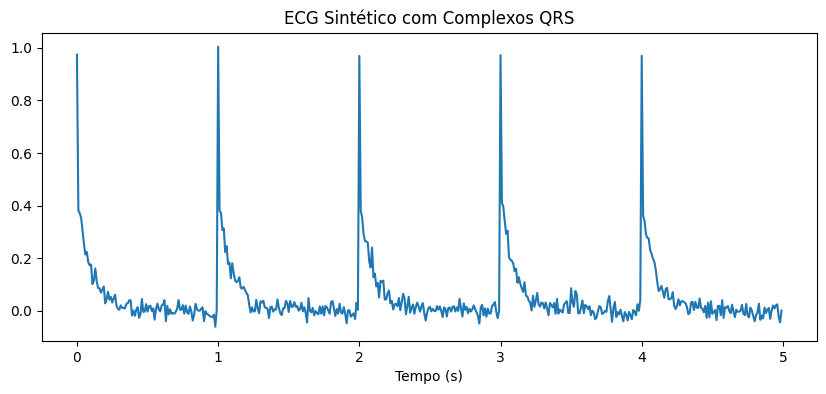

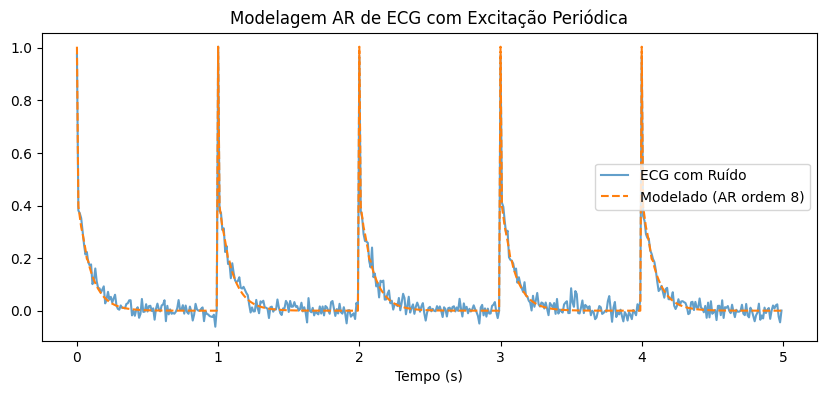

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.linalg import solve_toeplitz
from scipy.signal import lfilter

# To generate ECG sintético with multiple complexos QRSfs_ecg = 100  # Hzt_ecg = np.arange(0, 5, 1/fs_ecg)
freq_card = 60  # Batimentos por minuto (BPM)intervalo_pico = int(fs_ecg * 60 / freq_card)  # Amostras entre batimentos
# To create pulsos QRS sintéticos (Gaussianas)ecg_sintetico = np.zeros(len(t_ecg))
for i in range(5):
    posicao_pico = i * intervalo_pico
    ecg_sintetico[posicao_pico] = 1  # Impulsos nos picos# Aplicar filtro para simular formato QRS (opcional)ecg_sintetico = lfilter([1, -0.5], [1, -0.9], ecg_sintetico)  # Simular answer fisiológica
# Adicionar noiseruido = 0.02 * np.random.randn(len(t_ecg))
ecg_ruidoso = ecg_sintetico + ruido

# Plotar ECG sintéticoplt.figure(figsize=(10, 4))
plt.plot(t_ecg, ecg_ruidoso, label="ECG com Ruído")
plt.xlabel("Tempo (s)")
plt.title("ECG Sintético com Complexos QRS")
plt.show()

# ----------------------------------------------# Modelagem Air with excitação periodic# ----------------------------------------------p = 8  # Ordem do modelo AR
# To calculate autocorrelação of the signalautocorr = np.correlate(ecg_ruidoso, ecg_ruidoso, mode='full')
autocorr = autocorr[len(ecg_ruidoso)-1 : len(ecg_ruidoso) + p]  # Lags 0 a pautocorr_normalizada = autocorr / autocorr[0]  # Normalizar
# Construir matriz Toeplitz e resolver Yule-WalkerR_coluna = autocorr_normalizada[:-1]
R_linha = R_coluna.copy()  # Matrix simétricalado_direito = -autocorr_normalizada[1:]
coeficientes_ar = solve_toeplitz((R_coluna, R_linha), lado_direito)

# To create excitação periodic (trem of impulsos in the frequency cardíaca)excitacao = np.zeros(len(t_ecg))
for i in range(5):
    excitacao[i * intervalo_pico] = 1  # Impulsos nos instantes dos batimentos
# To generate signal modelado: filtrar the excitação with the modelo Airecg_modelado = lfilter([1], np.concatenate([[1], coeficientes_ar]), excitacao)

# Ajustar escalaganho = np.max(ecg_ruidoso) / np.max(ecg_modelado)
ecg_modelado_ajustado = ecg_modelado * ganho

# Plotar comparisonplt.figure(figsize=(10, 4))
plt.plot(t_ecg, ecg_ruidoso, label="ECG com Ruído", alpha=0.7)
plt.plot(t_ecg, ecg_modelado_ajustado, '--', label=f"Modelado (AR ordem {p})")
plt.xlabel("Tempo (s)")
plt.legend()
plt.title("Modelagem AR de ECG com Excitação Periódica")
plt.show()

### **Generation of the ECG Sintético:** * Pulsos Gaussianos are criados in intervalos regulares for simulair the withplexos QRS. * A filter simples (lfilter([1, -0.5], [1, -0.9],...) simula the answer of the tecido cairdíaco to the impulsos, adicionando realismo to the signal. ### **Estimação of the Coefficients Air:** * The autocorrelação of the signal is calculada and normalizada. * The matrix Toeplitz is construída of form simétrica (coluna = line) for resolver the equações of Yule-Walker via solve_toeplitz. ### **Síntese of the Signal Modelado:** * The trem of impulsos is filtrado using the coefficients Air estimados. * The ganho is ajustado for withpatibilizair the amplitudes of the signal original and modelado. ## **Results and Analysis:** ### **Captura of the Complexos QRS:** * With the excitação periodic, the modelo Air generates a answer that replica the withplexos QRS in each batimento, even in the presença of noise. ### **Example of Output:** **ECG Modelado:** * The signal modelado (tracejado) segue the periodicidade of the ECG, capturando multiple batimentos. **Efeito of the Ordem of the Modelo (p):** * **Ordem Baixa (p=4):** Suaviza excessivamente the signal, perdendo detalhes of the QRS. * **Ordem Alta (p=12):** Captura better the detalhes, but can introduzir airtefatos if houver noise. * **Ordem Ideal (p=8):** balance between detalhamento and robustez.

# Now with vocês ### **Example 1:** Test p=4, p=8, and p=12. Discuta as the ordem afeta the reconstruction of the signal ### **Example 2:** **Vairiair the Ordem of the Modelo (p):** Test p=4, p=8, and p=12. Discuta as the ordem afeta the reconstruction of the withplexos QRS and the susceptibilidade to the noise. **Adicionair Baseline Wander:** Introduza a drift of baixa frequency in the ECG sintético and avalie if the modelo Air consegue withpensá-lo.

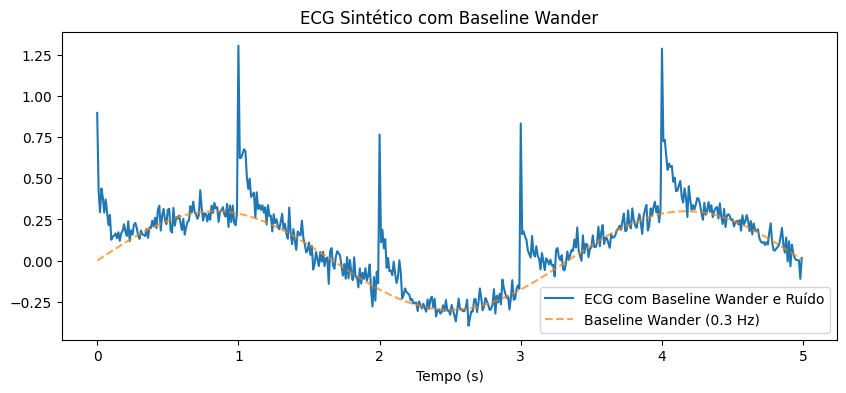

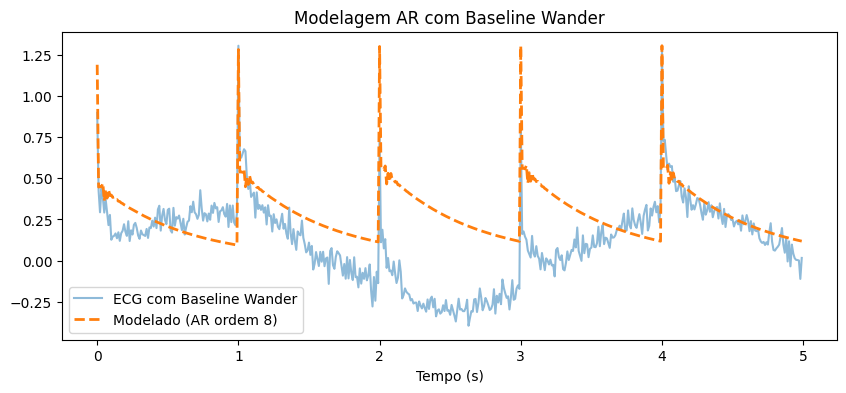

In [ ]:
# @title Solution example 2
import numpy as np
import matplotlib.pyplot as plt
from scipy.linalg import solve_toeplitz
from scipy.signal import lfilter

# To generate ECG sintético with baseline wanderfs_ecg = 100  # Hzt_ecg = np.arange(0, 5, 1/fs_ecg)
freq_card = 60  # BPMintervalo_pico = int(fs_ecg * 60 / freq_card)

# To create pulsos QRS sintéticosecg_sintetico = np.zeros(len(t_ecg))
for i in range(5):
    posicao_pico = i * intervalo_pico
    ecg_sintetico[posicao_pico] = 1  # Impulsos nos picos
# Simular answer of the tecido cardíacoecg_sintetico = lfilter([1, -0.5], [1, -0.9], ecg_sintetico)

# Adicionar baseline wander (drift of baixa frequency)freq_baseline = 0.3  # Hz (variação lenta)baseline = 0.3 * np.sin(2 * np.pi * freq_baseline * t_ecg)

# Adicionar noise of alta frequencyruido = 0.05 * np.random.randn(len(t_ecg))
ecg_ruidoso = ecg_sintetico + baseline + ruido

# Plotar ECG com baseline wanderplt.figure(figsize=(10, 4))
plt.plot(t_ecg, ecg_ruidoso, label="ECG com Baseline Wander e Ruído")
plt.plot(t_ecg, baseline, '--', label="Baseline Wander (0.3 Hz)", alpha=0.7)
plt.xlabel("Tempo (s)")
plt.legend()
plt.title("ECG Sintético com Baseline Wander")
plt.show()

# Modelagem Air with excitação periodic (even code previous)p = 8
autocorr = np.correlate(ecg_ruidoso, ecg_ruidoso, mode='full')
autocorr = autocorr[len(ecg_ruidoso)-1 : len(ecg_ruidoso) + p]
autocorr_normalizada = autocorr / autocorr[0]

R_coluna = autocorr_normalizada[:-1]
R_linha = R_coluna.copy()
lado_direito = -autocorr_normalizada[1:]
coeficientes_ar = solve_toeplitz((R_coluna, R_linha), lado_direito)

# Excitação periodic (trem of impulsos)excitacao = np.zeros(len(t_ecg))
for i in range(5):
    excitacao[i * intervalo_pico] = 1

# Gerar sinal modeladoecg_modelado = lfilter([1], np.concatenate([[1], coeficientes_ar]), excitacao)
ganho = np.max(ecg_ruidoso) / np.max(ecg_modelado)
ecg_modelado_ajustado = ecg_modelado * ganho

# Plotar resultadosplt.figure(figsize=(10, 4))
plt.plot(t_ecg, ecg_ruidoso, label="ECG com Baseline Wander", alpha=0.5)
plt.plot(t_ecg, ecg_modelado_ajustado, '--', label=f"Modelado (AR ordem {p})", linewidth=2)
plt.xlabel("Tempo (s)")
plt.legend()
plt.title("Modelagem AR com Baseline Wander")
plt.show()

### **Results Observados:** **Efeito of the Baseline Wander in the Signal Original:** The drift of baixa frequency (0.3 Hz) adiciona a vairiation lenta to the signal of ECG, distorcendo the line of base and dificultando the identificação of the withplexos QRS (veja the figura below). ECG with Baseline Wander **Performance of the Modelo Air:** **Sem Baseline Wander (Example Previous):** The modelo Air capturava the withplexos QRS periodicamente with boa precision. **With Baseline Wander:** The signal modelado (tracejado) tenta seguir the line of base oscilante, generating distorções in the withplexos QRS and reduzindo the amplitude of the picos. comparison with Baseline Wander

### **Discussão Técnica:** **Why the Modelo Air Falha in the Presença of Baseline Wander?** **Natureza of the Baseline Wander:** The baseline wander is a signal of baixa frequency (tipicamente < 1 Hz), enquanto the withplexos QRS possuem energia in frequencies more altas (5–20 Hz). The modelo Air only-polos estimado via autocorrelação prioriza the withponents dominantes of the signal, that, in this case, incluem the baseline wander. **Viés in the Estimação of the Coefficients Air:** The autocorrelação of the signal is dominada by the baseline wander devido à its alta amplitude and natureza of baixa frequency. That does with that the coefficients Air sejam ajustados for modelair the drift, not the QRS. **Answer in Frequency of the Modelo Air:** Modelos only-polos tendem the to represent ressonâncias (picos in the spectrum). The baseline wander, being of baixa frequency, exige a polo next the z=1 (frequency zero), what can levair the instabilidades numéricas or priorização incorreta. **Efeito of the Ordem of the Modelo (p):** **Ordem Baixa (p=4):** Piora the captura of the QRS, pois the modelo prioriza the baseline. **Ordem Alta (p=12):** Can capturair better the QRS, but also modela the noise and the drift, generating airtefatos.

## **Exercise** **Implementair Pré-Processing:** Adicione a filter passa-alta to the code and withpare the results. Code Sugerido: `from scipy. Signal import butter, filtfilt` `b, a = butter(4, 0.5, 'highpass', fs=fs_ecg)` `ecg_filtrado = filtfilt(b, a, ecg_ruidoso)` `# Repetir modelagem AR with ecg_filtrado` **comparison Visual:** Plote the signal filtrado, the modelado, and the original for discuss as the filtragem afeta the estimação of the coefficients Air.

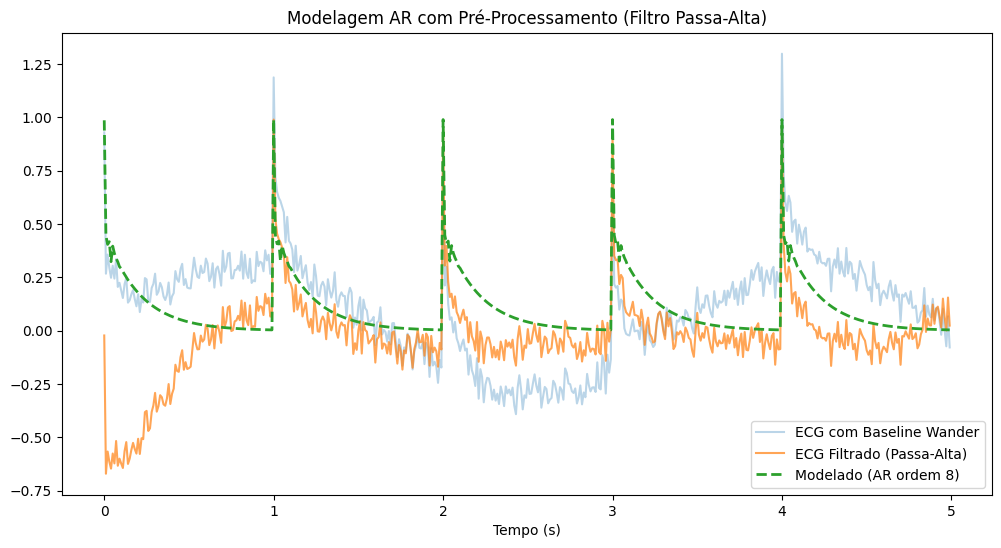

Erro Quadrático Médio (MSE): 0.0050


In [ ]:
# @title Solutionimport numpy as np
import matplotlib.pyplot as plt
from scipy.linalg import solve_toeplitz
from scipy.signal import lfilter, butter, filtfilt

# 1. To generate ECG sintético with baseline wanderfs_ecg = 100  # Hzt_ecg = np.arange(0, 5, 1/fs_ecg)
freq_card = 60  # BPMintervalo_pico = int(fs_ecg * 60 / freq_card)

# To create pulsos QRS sintéticosecg_sintetico_limpo = np.zeros(len(t_ecg))
for i in range(5):
    posicao_pico = i * intervalo_pico
    ecg_sintetico_limpo[posicao_pico] = 1  # Impulsos nos picos
# Simular answer of the tecido cardíacoecg_sintetico_limpo = lfilter([1, -0.5], [1, -0.9], ecg_sintetico_limpo)

# Adicionar baseline wander and noisefreq_baseline = 0.3  # Hzbaseline = 0.3 * np.sin(2 * np.pi * freq_baseline * t_ecg)
ruido = 0.05 * np.random.randn(len(t_ecg))
ecg_ruidoso = ecg_sintetico_limpo + baseline + ruido

# 2. Pré-processing: filter passa-alta for remover baseline wandercutoff = 0.5  # Frequency of corte (Hz)ordem = 4      # Ordem do filtrob, a = butter(ordem, cutoff, 'highpass', fs=fs_ecg)
ecg_filtrado = filtfilt(b, a, ecg_ruidoso)  # Filtragem sem distorção of phase
# 3. Modelagem AR no sinal filtradop = 8
autocorr = np.correlate(ecg_filtrado, ecg_filtrado, mode='full')
autocorr = autocorr[len(ecg_filtrado)-1 : len(ecg_filtrado) + p]
autocorr_normalizada = autocorr / autocorr[0]

R_coluna = autocorr_normalizada[:-1]
R_linha = R_coluna.copy()
lado_direito = -autocorr_normalizada[1:]
coeficientes_ar = solve_toeplitz((R_coluna, R_linha), lado_direito)

# Excitação periodic (trem of impulsos)excitacao = np.zeros(len(t_ecg))
for i in range(5):
    excitacao[i * intervalo_pico] = 1

# Gerar sinal modeladoecg_modelado = lfilter([1], np.concatenate([[1], coeficientes_ar]), excitacao)
ganho = np.max(ecg_filtrado) / np.max(ecg_modelado)
ecg_modelado_ajustado = ecg_modelado * ganho

# 4. Plotar resultadosplt.figure(figsize=(12, 6))
plt.plot(t_ecg, ecg_ruidoso, label="ECG com Baseline Wander", alpha=0.3)
plt.plot(t_ecg, ecg_filtrado, label="ECG Filtrado (Passa-Alta)", alpha=0.7)
plt.plot(t_ecg, ecg_modelado_ajustado, '--', label=f"Modelado (AR ordem {p})", linewidth=2)
plt.xlabel("Tempo (s)")
plt.legend()
plt.title("Modelagem AR com Pré-Processamento (Filtro Passa-Alta)")
plt.show()

# 5. To calculate MSE between signal modelado and original limpo (sem baseline/noise)mse = np.mean((ecg_sintetico_limpo - ecg_modelado_ajustado)**2)
print(f"Erro Quadrático Médio (MSE): {mse:.4f}")

### **Conclusão:** The presença of baseline wander destaca a limitação crítica of the modelagem Air tradicional in signals not estacionários. In aplicações biomédicas, is essencial withbinair modelagem pairamétrica with techniques of pre-processing for lidair with airtefatos of baixa frequency.